<a href="https://colab.research.google.com/github/mashaan14/YouTube-channel/blob/main/2023_11_07_graph_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.stats import multivariate_normal

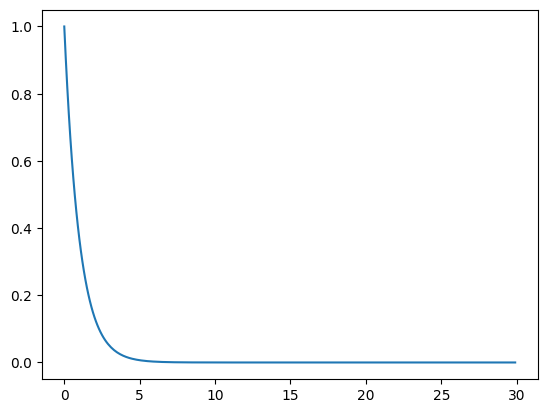

In [ ]:
x = np.arange(0, 30, 0.1)
y = np.exp(-x)
plt.plot(x, y)
plt.savefig('plot-neg-x.png', bbox_inches='tight', dpi=600)

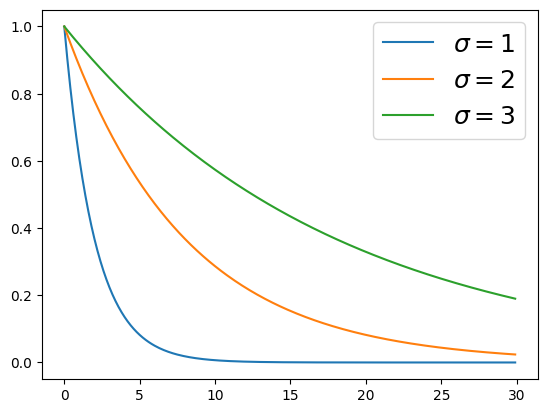

In [ ]:
x = np.arange(0, 30, 0.1)
for i in [1,2,3]:
  y = np.exp(-x/(2*(i**2)))
  plt.plot(x, y, label='$\sigma=$'+str(i))

plt.legend(fontsize = 18)
plt.savefig('plot-sigma.png', bbox_inches='tight', dpi=600)

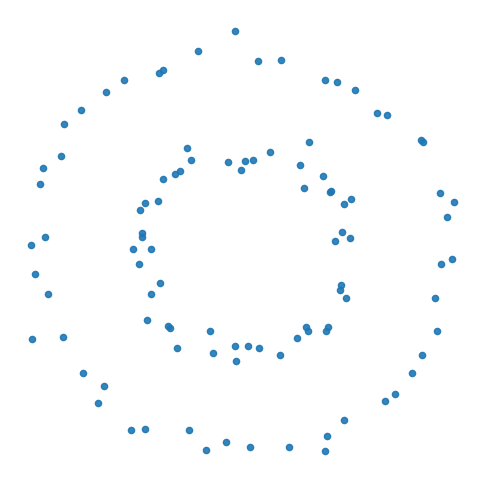

In [ ]:
n_samples = 100
seed = 30
X, _ = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

fig = plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], s=20, alpha=0.9);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.box(False)
plt.savefig('data.png', bbox_inches='tight', dpi=600)

In [ ]:
# An n by n matrix, where each element represents the disance between a pair of samples
A_full = np.sqrt(np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1))

# get the indices of the smallest k+1 elements
A_sort = A_full.argsort(axis=0)[:6]
A = np.zeros_like(A_full)

# fill the indices of the nearest neighbor with ones
for i in range(A.shape[0]):
  A[i,A_sort[:,i]] = 1

np.fill_diagonal(A, 0)

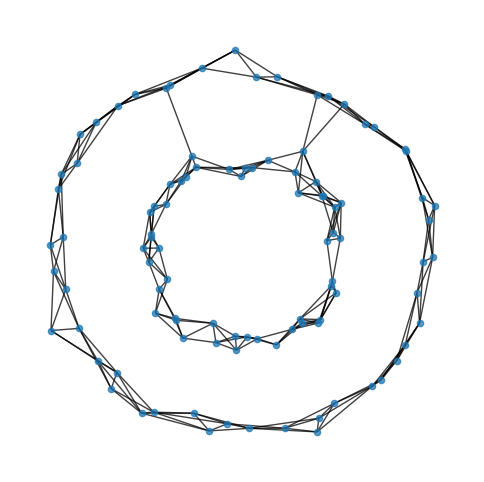

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
G1 = nx.from_numpy_array(A)
nx.draw(G1, X, node_size=20, alpha=0.75)

ax.set_axis_off()
plt.savefig('graph.png', bbox_inches='tight', dpi=600)

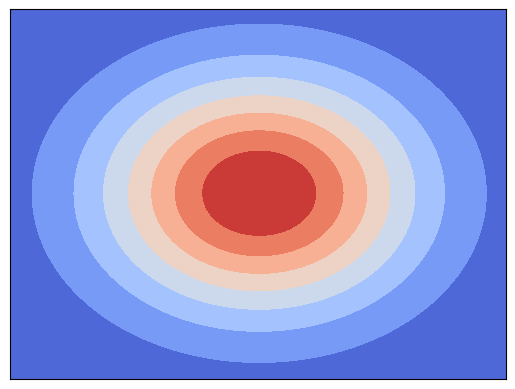

In [ ]:
mu_all = np.array([[0,0], [0,0]])
sigma_all = np.array([[[0.1, 0], [0, 0.1]], [[0.2, 0.], [0., 0.2]]])

x, y = np.mgrid[-1:1:.01, -1:1:.01]
for i in range(mu_all.shape[0]):
  rv = multivariate_normal(mu_all[i,:], sigma_all[i,:,:])
  data = np.dstack((x, y))
  z = rv.pdf(data)
  plt.contourf(x, y, z, cmap='coolwarm')
  plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
  # plt.show()
  plt.savefig('gaussian'+str(i)+'.png', bbox_inches='tight', dpi=600)